In [66]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline

In [67]:
data_path = "emails.csv"
message_dataset = pd.read_csv(data_path, engine='python')
message_dataset.head(3)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1


In [68]:
message_dataset.shape

(5728, 2)

<AxesSubplot:>

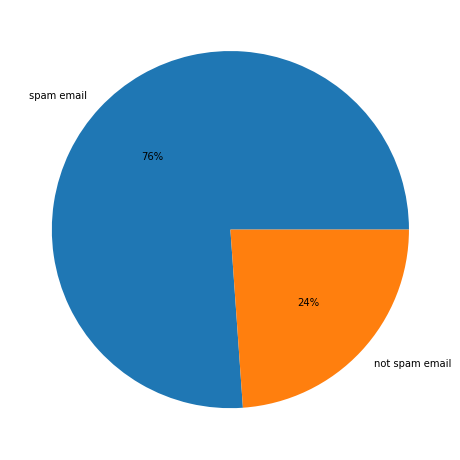

In [69]:
plt.rcParams["figure.figsize"] = [8,10]
message_dataset.spam.value_counts().plot(kind='pie', autopct='%1.0f%%', labels=["spam email", "not spam email"], ylabel='')

In [60]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
message_dataset['text_without_sw'] = message_dataset['text'] .apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))


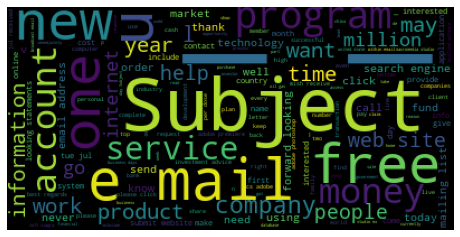

In [61]:
message_dataset_spam = message_dataset[message_dataset["spam"] == 1]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(message_dataset_spam['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

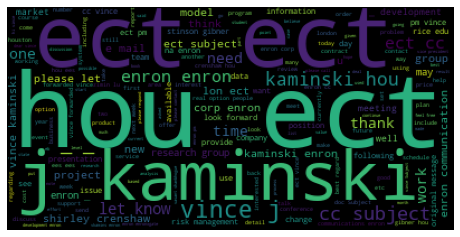

In [62]:
message_dataset_ham = message_dataset[message_dataset["spam"] == 0]
plt.rcParams["figure.figsize"] = [8,10]
text = ' '.join(message_dataset_ham['text_without_sw'])
wordcloud2 = WordCloud().generate(text)
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [63]:
X = message_dataset["text"]
y = message_dataset["spam"]

def clean_text(doc):

    document = re.sub('[^a-zA-Z]', ' ', doc)
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\s+', ' ', document)

    return document

In [65]:
X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))